# Importing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
import re
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import skew 
from scipy.stats import boxcox_normmax

In [2]:
df_train = pd.read_csv('df_train_cleaned.csv')

## Skewness Transformations

In [ ]:
df_train['SalePrice'].head()

In [ ]:
df_train['SalePrice'] = np.expm1(df_train['SalePrice'])

In [ ]:
df_train.SalePrice = np.log(df_train.SalePrice)

In [4]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])

In [ ]:
# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_num['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_num['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(df_num['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

In [ ]:
df_train.SalePrice = np.log1p(df_train.SalePrice)

In [ ]:
# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

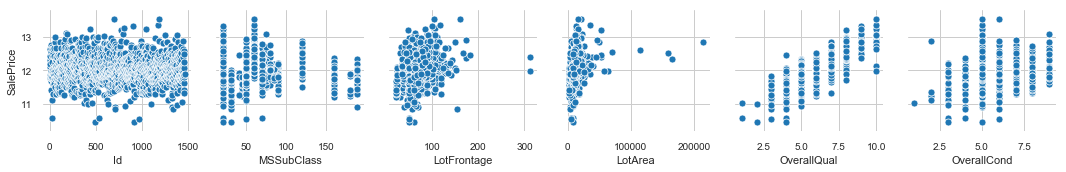

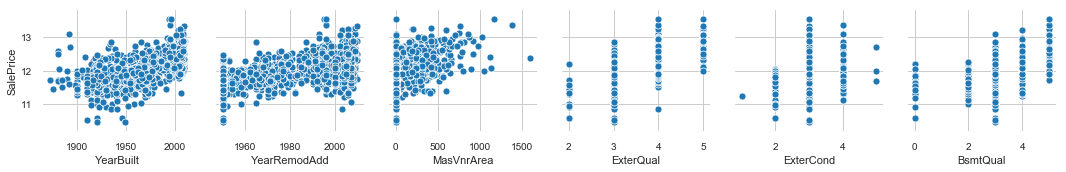

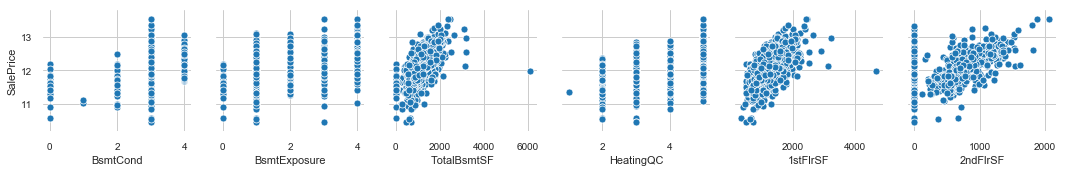

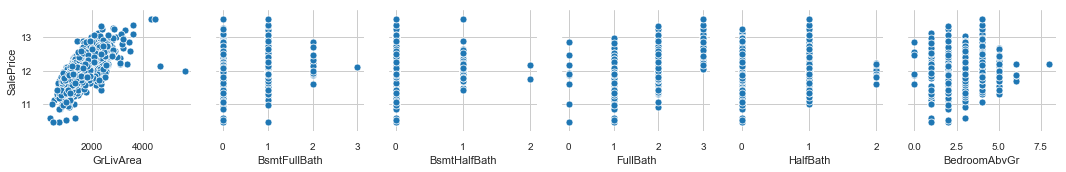

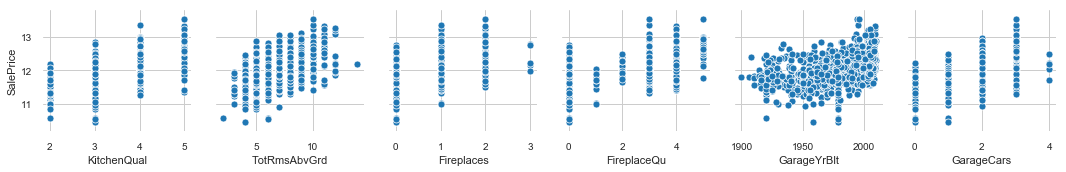

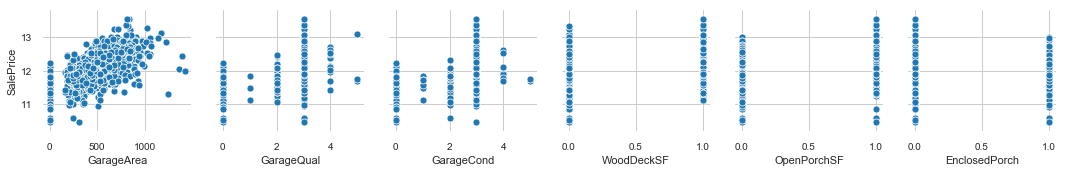

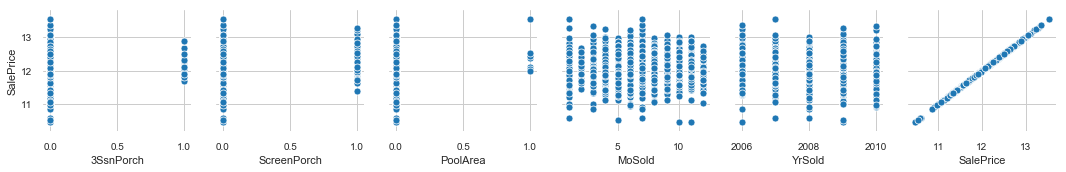

In [8]:
sns.set_style("whitegrid")

for i in range(0, len(df_num.columns), 6):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+6],
                y_vars=['SalePrice'])

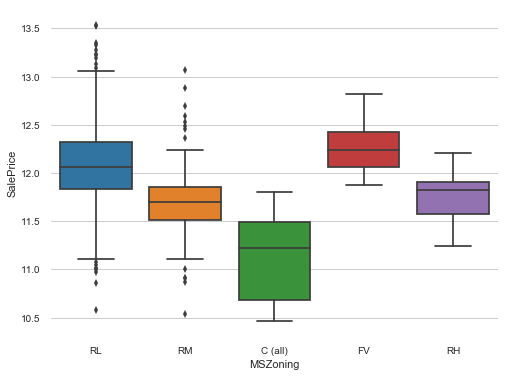

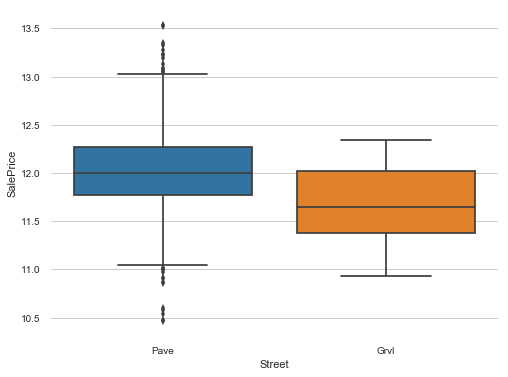

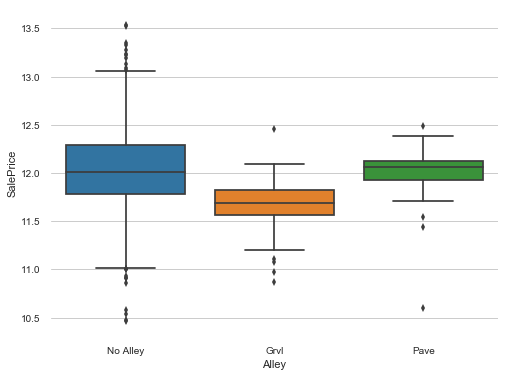

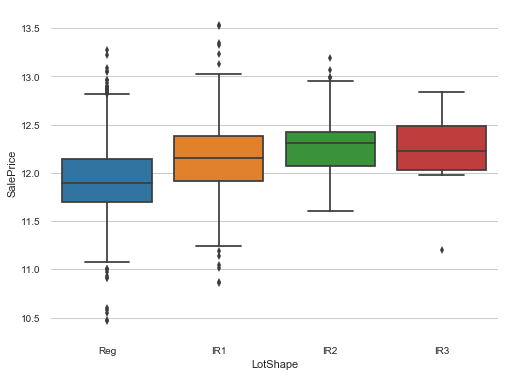

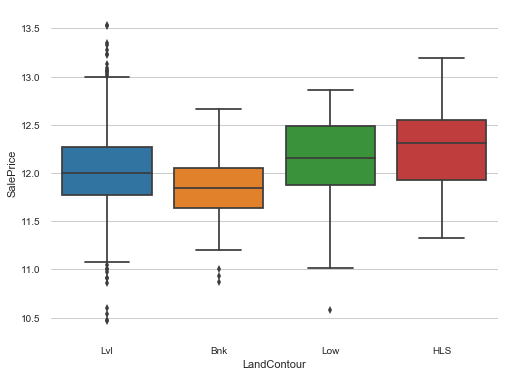

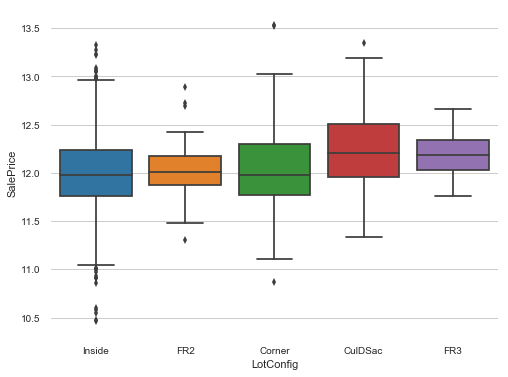

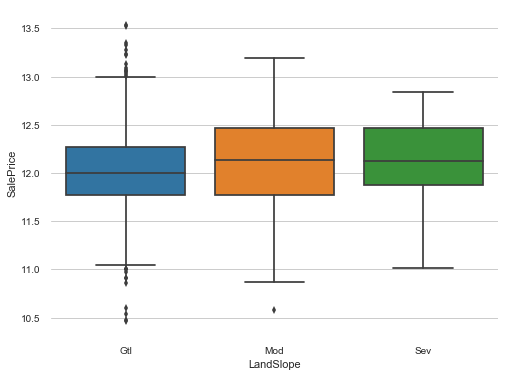

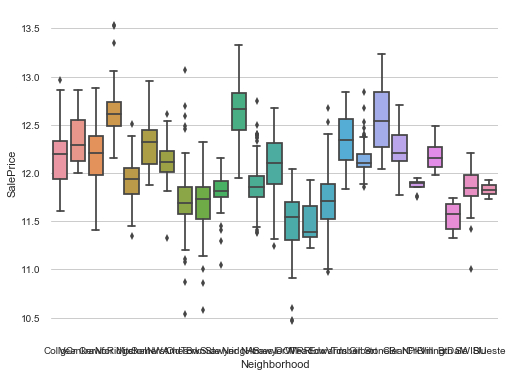

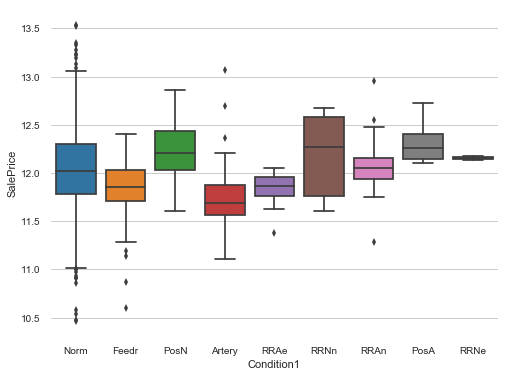

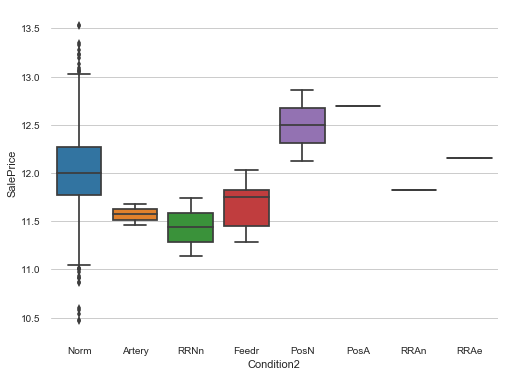

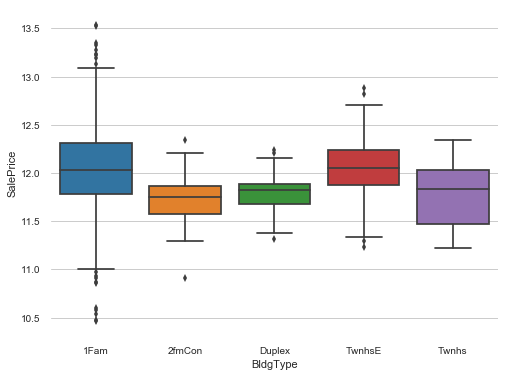

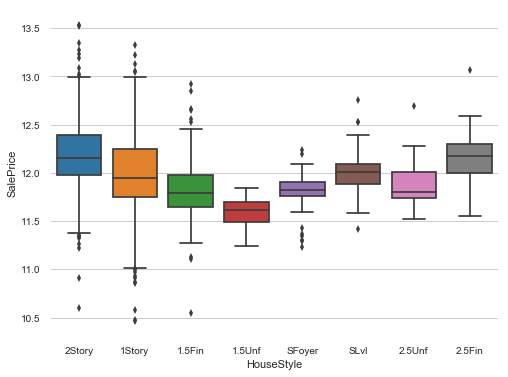

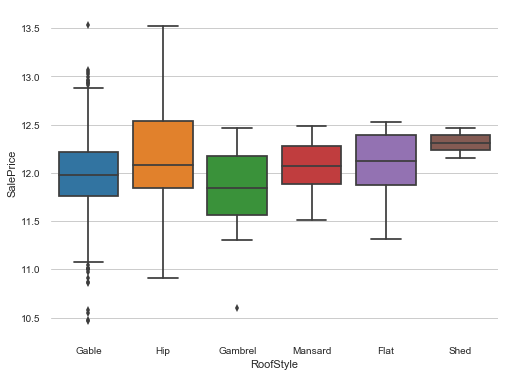

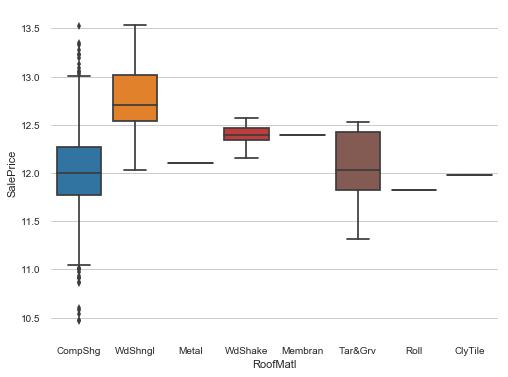

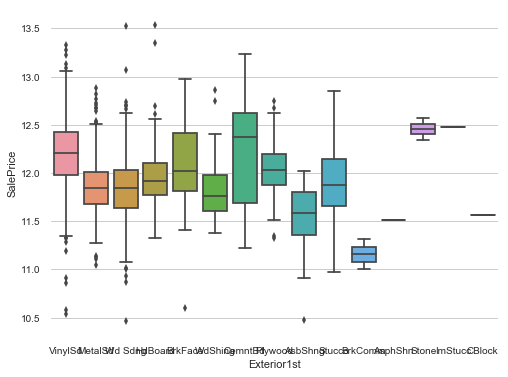

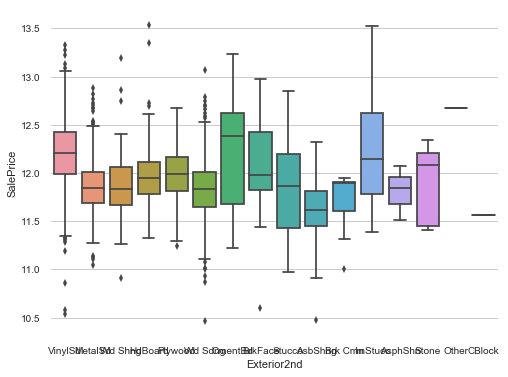

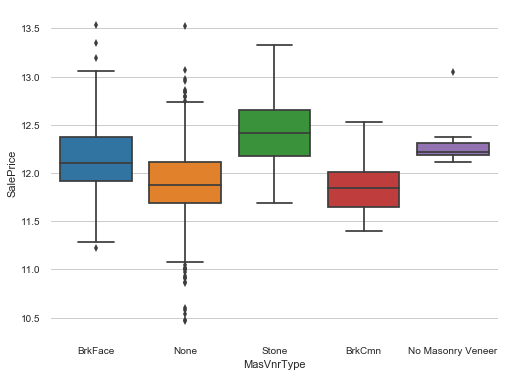

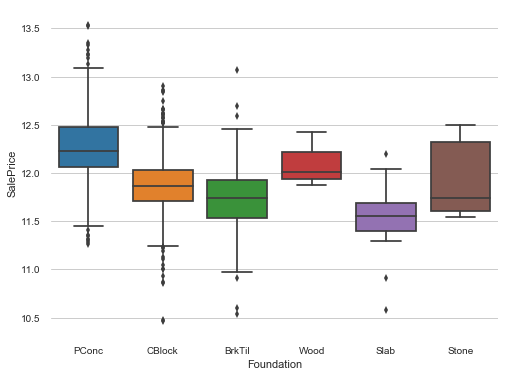

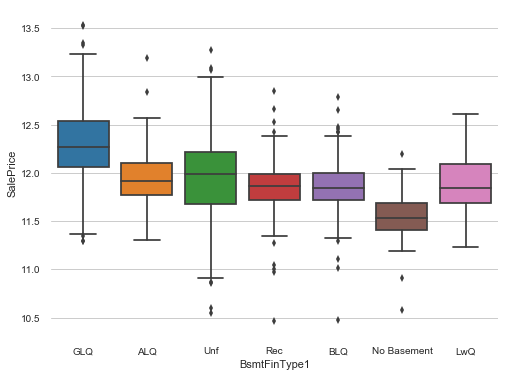

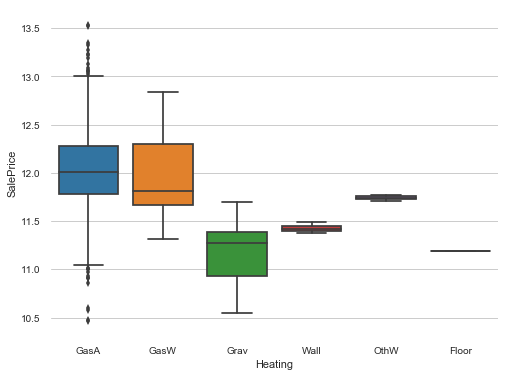

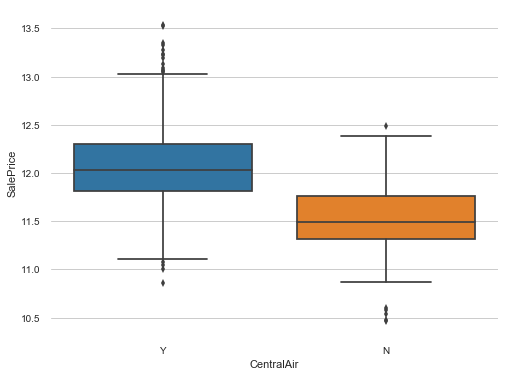

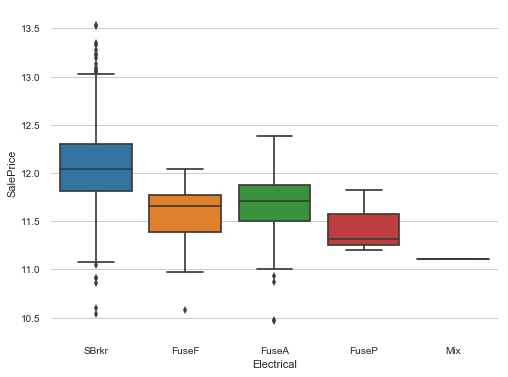

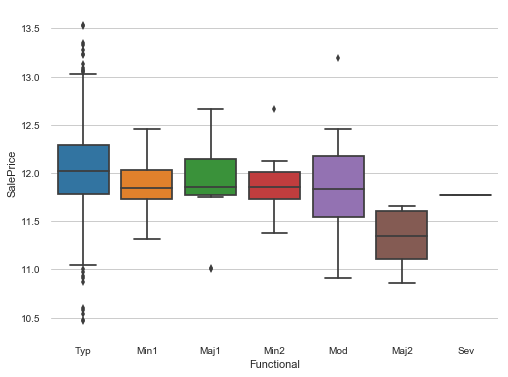

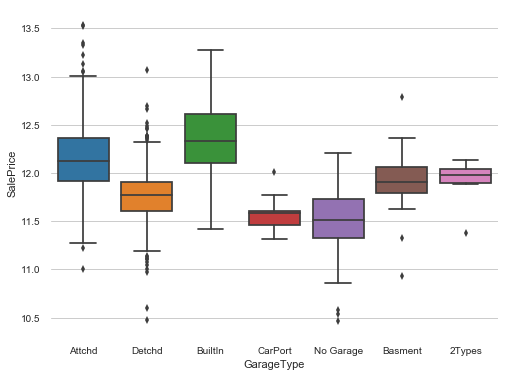

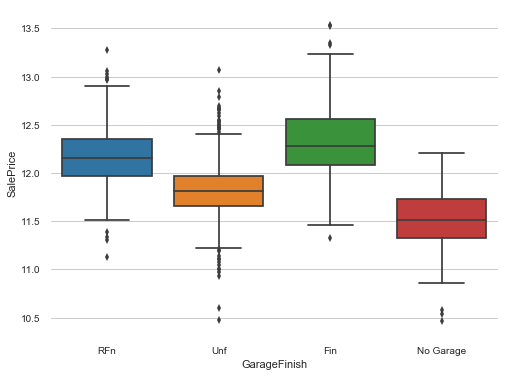

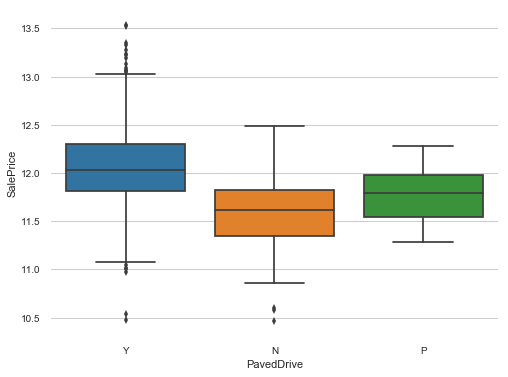

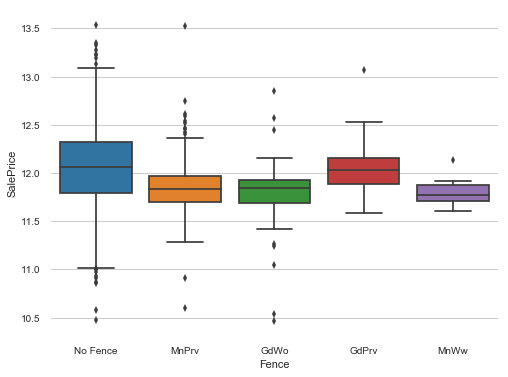

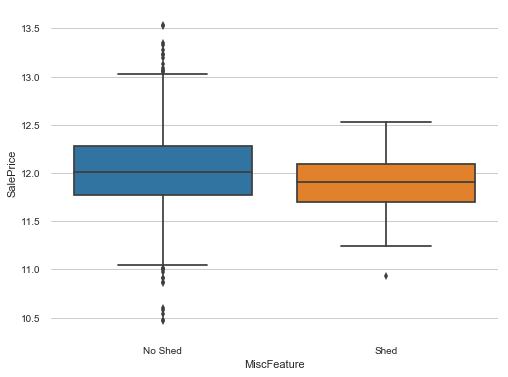

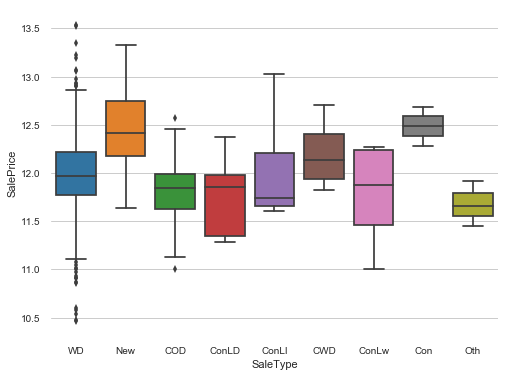

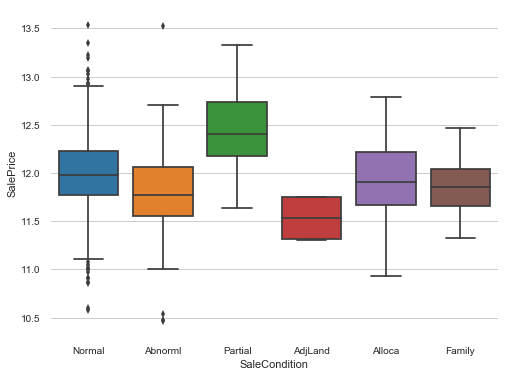

In [11]:
categorical_features = df_train.select_dtypes(include=['object']).columns
vars_box = categorical_features
for var in vars_box:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)